In [1]:
import networkx as nx
from nonlinear_walk import NonlinearRandomWalk

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_graph(width, height):
    pos = {i * height + j: np.array([i,j]) for i in range(width) for j in range(height)}
    G = nx.grid_2d_graph(width, height, periodic=False)
    return nx.convert_node_labels_to_integers(G), pos

In [3]:
def draw_graph(G, pos=None):
    if pos is None:
        pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=10)
    nx.draw_networkx_edges(G, pos, width=1)
    plt.axis('off')
    plt.show()

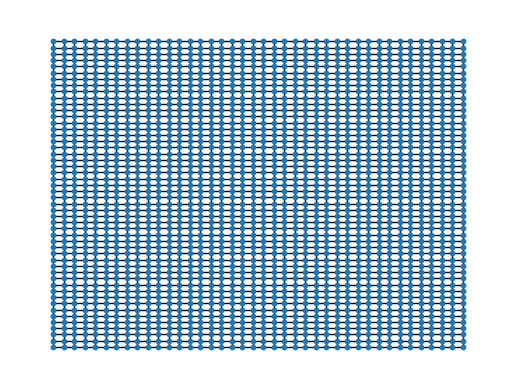

In [4]:
G, pos = generate_graph(40, 50)
draw_graph(G, pos)

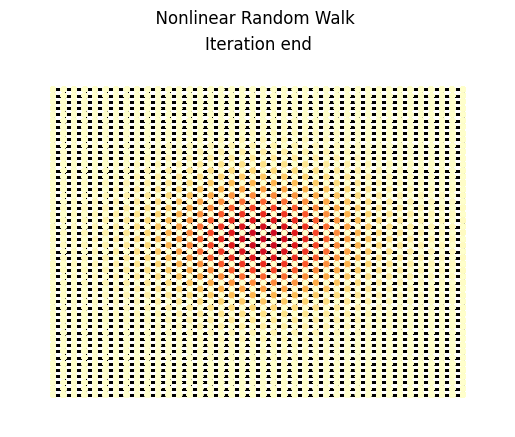

In [6]:
initial_node = [1025]
initial_pr = np.zeros(len(G))
initial_pr[initial_node] = 1 / len(initial_node)
graph_walk = NonlinearRandomWalk(G, pos, initial_pr=initial_pr)
graph_walk.get_visualization(alpha=0, max_iter=100)

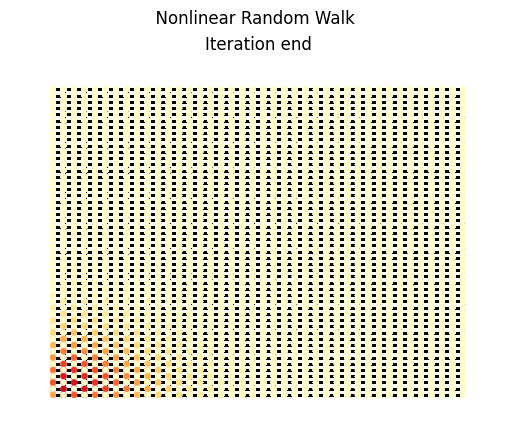

In [7]:
initial_node = [0]
initial_pr = np.zeros(len(G))
initial_pr[initial_node] = 1 / len(initial_node)
graph_walk = NonlinearRandomWalk(G, pos, initial_pr=initial_pr)
graph_walk.get_visualization(alpha=-5, max_iter=100)

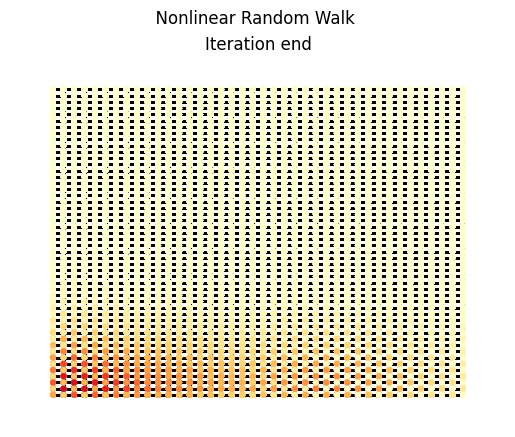

In [8]:
initial_node = [200, 550, 1300]
initial_pr = np.zeros(len(G))
initial_pr[initial_node] = 1 / len(initial_node)
graph_walk = NonlinearRandomWalk(G, pos, initial_pr=initial_pr)
graph_walk.get_visualization(alpha=6, max_iter=100)

In [9]:
graph_walk = NonlinearRandomWalk(G)
graph_walk.calculate_for_alphas(-6, 6, 200, tol=1e-6, max_iter=1000)

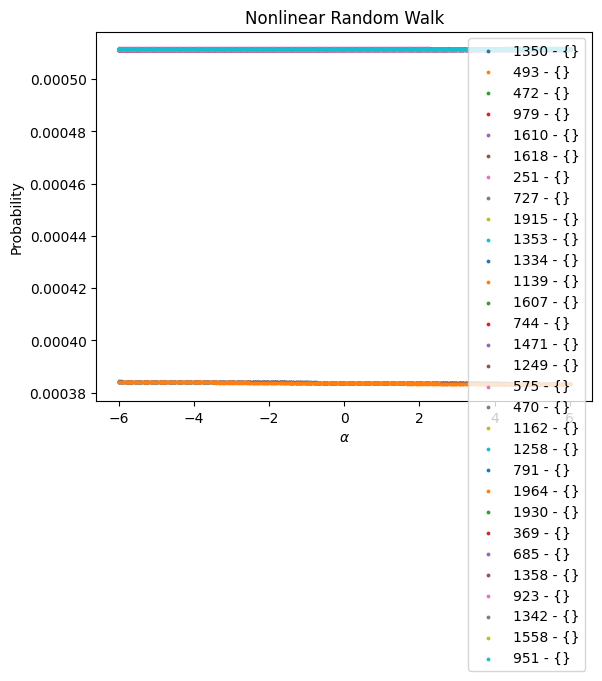

In [12]:
graph_walk.plot_for_alphas(np.random.choice(G.nodes, 30))

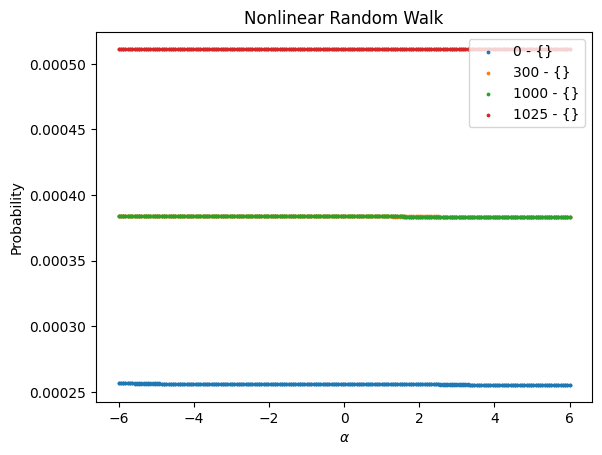

In [11]:
graph_walk.plot_for_alphas([0, 300, 1000, 1025])